In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
import csv
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


%matplotlib inline

In [2]:
df = pd.read_csv('base_prueba_tecnica_angie.csv',encoding='ISO-8859-1', sep=';')

In [3]:
df

,ID,Edad,Genero,Ingresos Anuales,Gasto Mensual,Puntuaci¢n de Crdito,Regi¢n,Comportamiento en linea,Compras en el ultimo a¤o
0,1,21,Masculino,222011,2297,335,Sur,8,81
1,2,26,Masculino,239229,3420,329,Oeste,10,27
2,3,38,Masculino,716278,36965,711,Oeste,9,82
3,4,64,Femenino,697325,9846,855,Sur,2,6
4,5,52,Femenino,1032569,6607,989,Sur,3,2
...,...,...,...,...,...,...,...,...,...
2995,2996,31,Masculino,1724725,25756,792,Sur,10,83
2996,2997,46,Masculino,1683667,29508,504,Oeste,10,81
2997,2998,26,Masculino,193267,5940,421,Este,7,45
2998,2999,21,Femenino,106725,1762,440,Norte,7,89


In [4]:
grouped_data = df.groupby('Regi¢n')
grouped_data.Genero.count()

Regi¢n
Este     744
Norte    753
Oeste    767
Sur      736
Name: Genero, dtype: int64

In [5]:
grouped_data = df.groupby('Genero')
grouped_data.Genero.count()

Genero
Femenino     1497
Masculino    1503
Name: Genero, dtype: int64

In [6]:
print(df.describe())

                ID         Edad  Ingresos Anuales  Gasto Mensual  \
count  3000.000000  3000.000000      3.000000e+03    3000.000000   
mean   1500.500000    43.137000      7.458787e+05   17036.542667   
std     866.169729    16.239339      5.394438e+05   12741.646988   
min       1.000000    18.000000      1.000170e+05    1012.000000   
25%     750.750000    27.000000      2.324990e+05    4731.750000   
50%    1500.500000    46.000000      7.170055e+05   16474.000000   
75%    2250.250000    57.000000      1.109204e+06   26681.250000   
max    3000.000000    70.000000      1.998151e+06   44975.000000   

       Puntuaci¢n de Crdito  Comportamiento en linea  \
count            3000.000000              3000.000000   
mean              641.390333                 6.303667   
std               222.962069                 3.272057   
min               300.000000                 1.000000   
25%               435.000000                 3.000000   
50%               627.000000                 

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'Ingresos Anuales'}>],
       [<Axes: title={'center': 'Gasto Mensual'}>,
        <Axes: title={'center': 'Puntuaci¢n de Cr\x82dito'}>,
        <Axes: title={'center': 'Comportamiento en linea'}>],
       [<Axes: title={'center': 'Compras en el ultimo a¤o'}>, <Axes: >,
        <Axes: >]], dtype=object)

C:\Users\angie\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
C:\Users\angie\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


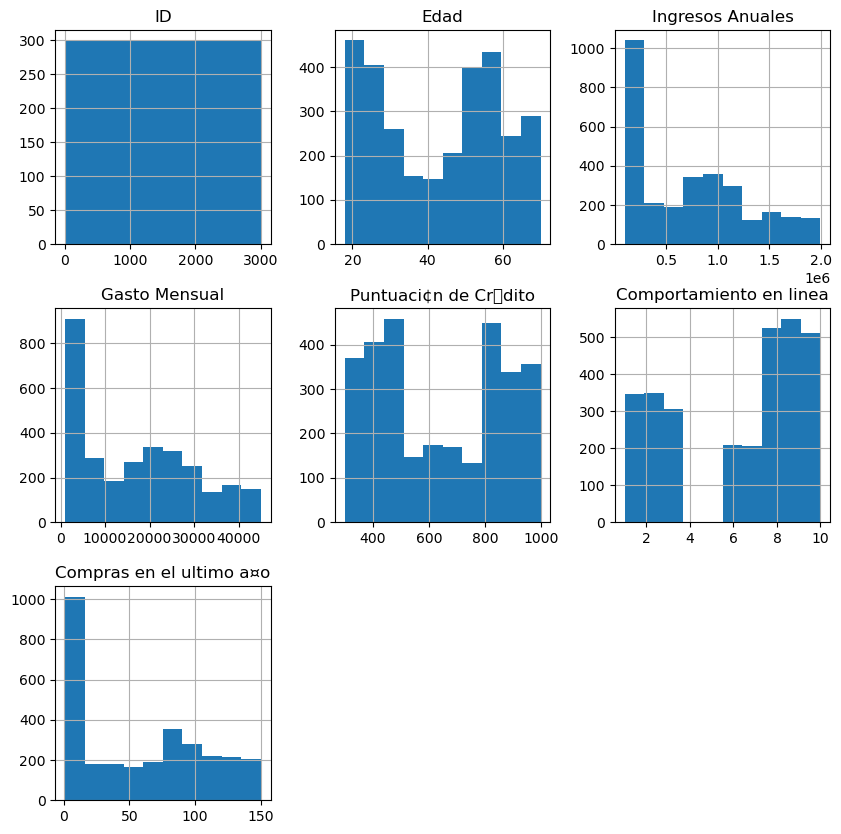

In [7]:
# 1. Análisis exploratorio de datos
# Distribución de catacterísticas

# Edad de los participantes
df.hist(figsize=(10, 10))

In [8]:
# Variables faltantes

print(df.isnull().sum())

ID                          0
Edad                        0
Genero                      0
Ingresos Anuales            0
Gasto Mensual               0
Puntuaci¢n de Crdito       0
Regi¢n                      0
Comportamiento en linea     0
Compras en el ultimo a¤o    0
dtype: int64


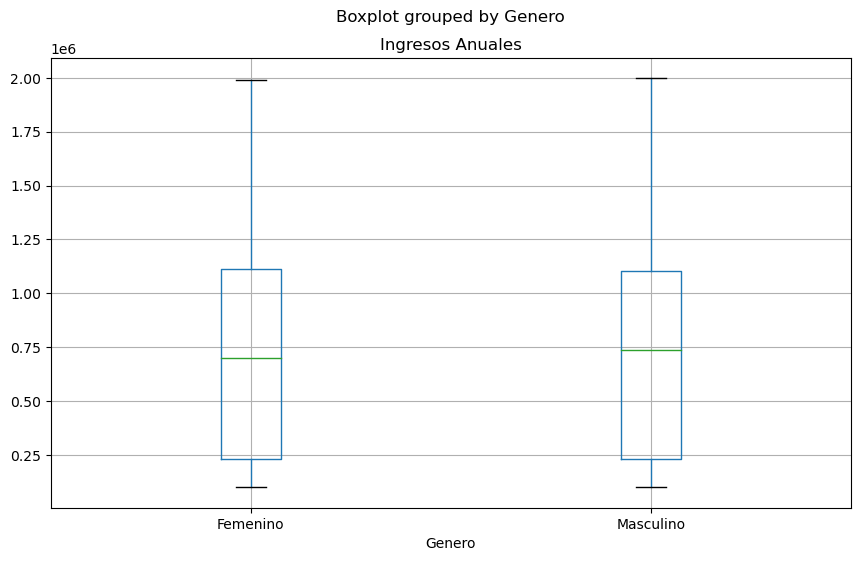

In [9]:
# Relaciones entre variables
ax = df.boxplot(column='Ingresos Anuales', by='Genero', figsize=(10,6))

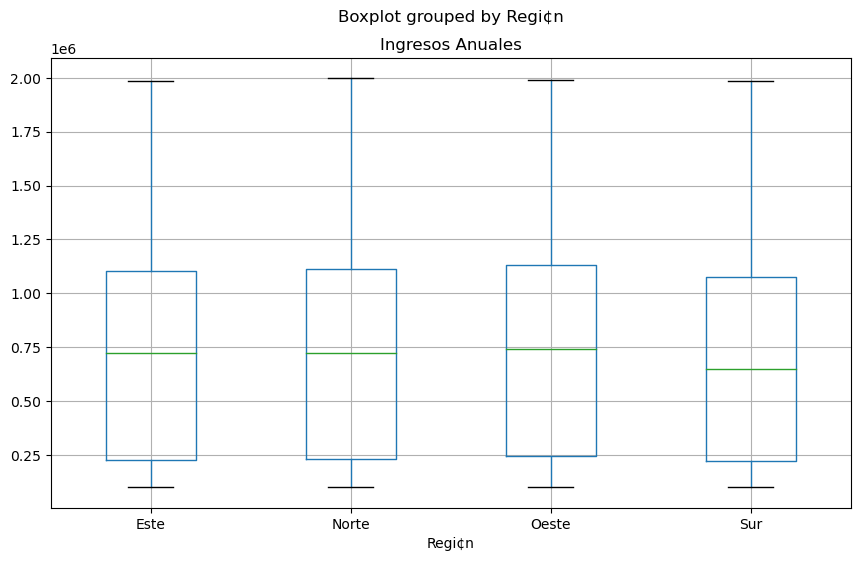

In [10]:
ax = df.boxplot(column='Ingresos Anuales', by='Regi¢n', figsize=(10,6))

C:\Users\angie\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
C:\Users\angie\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


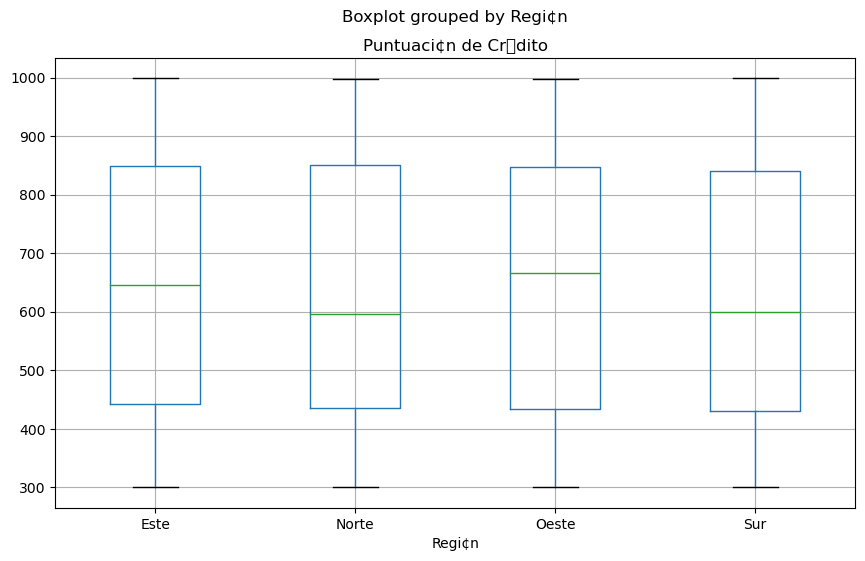

In [11]:
ax = df.boxplot(column='Puntuaci¢n de Crdito', by='Regi¢n', figsize=(10,6))

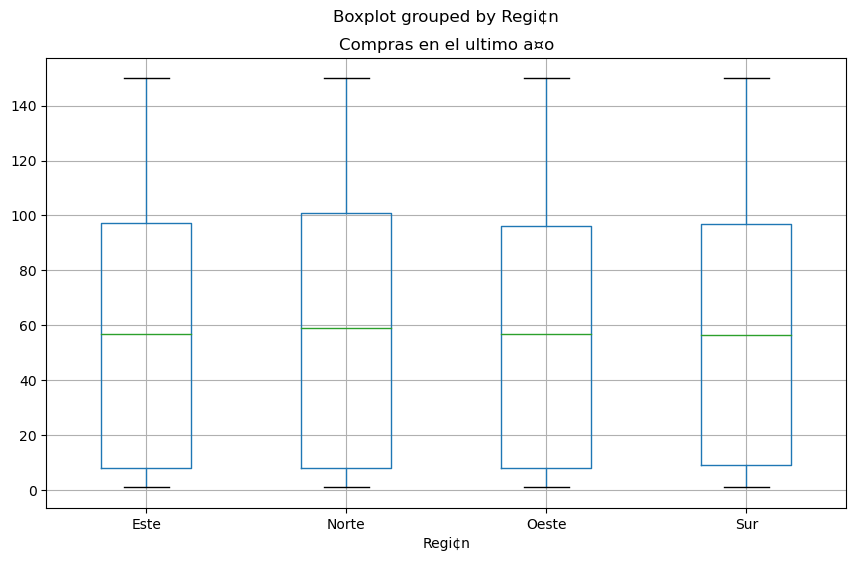

In [12]:
ax = df.boxplot(column='Compras en el ultimo a¤o', by='Regi¢n', figsize=(10,6))

<Axes: xlabel='Genero', ylabel='Compras en el ultimo a¤o'>

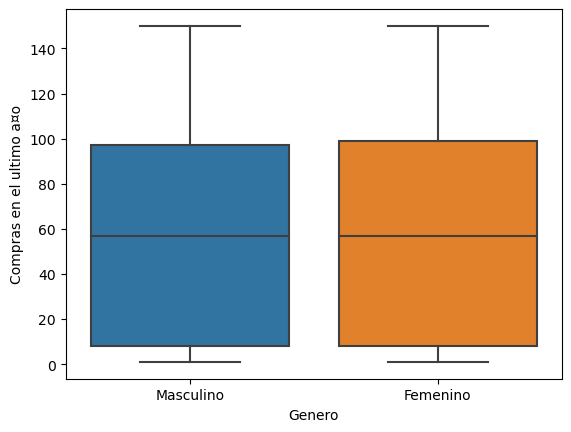

In [13]:
sns.boxplot(x='Genero', y='Compras en el ultimo a¤o', data=df)

<Axes: xlabel='Genero', ylabel='Comportamiento en linea'>

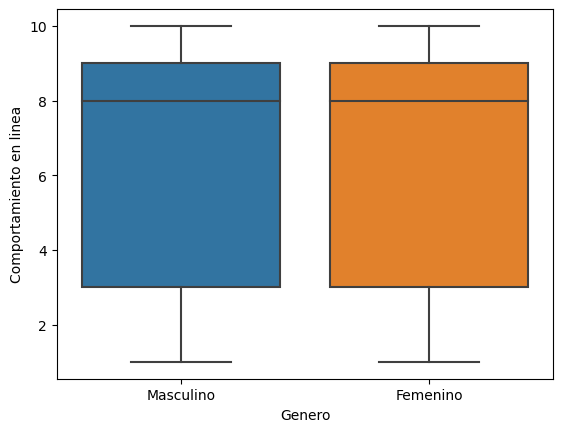

In [14]:
sns.boxplot(x='Genero', y='Comportamiento en linea', data=df)

<Axes: xlabel='Genero', ylabel='Comportamiento en linea'>

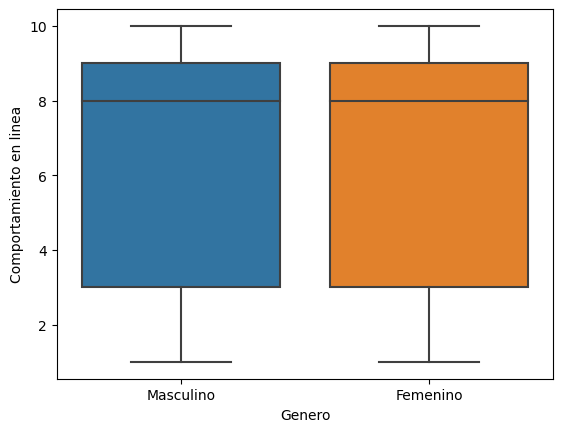

In [15]:
sns.boxplot(x='Genero', y='Comportamiento en linea', data=df)

In [16]:
label_encoder = LabelEncoder()
df['Genero_encoded'] = label_encoder.fit_transform(df['Genero'])
df['Regi¢n_encoded'] = label_encoder.fit_transform(df['Regi¢n'])
df

,ID,Edad,Genero,Ingresos Anuales,Gasto Mensual,Puntuaci¢n de Crdito,Regi¢n,Comportamiento en linea,Compras en el ultimo a¤o,Genero_encoded,Regi¢n_encoded
0,1,21,Masculino,222011,2297,335,Sur,8,81,1,3
1,2,26,Masculino,239229,3420,329,Oeste,10,27,1,2
2,3,38,Masculino,716278,36965,711,Oeste,9,82,1,2
3,4,64,Femenino,697325,9846,855,Sur,2,6,0,3
4,5,52,Femenino,1032569,6607,989,Sur,3,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,31,Masculino,1724725,25756,792,Sur,10,83,1,3
2996,2997,46,Masculino,1683667,29508,504,Oeste,10,81,1,2
2997,2998,26,Masculino,193267,5940,421,Este,7,45,1,0
2998,2999,21,Femenino,106725,1762,440,Norte,7,89,0,1


In [17]:
df = df.drop('Genero', axis=1)
df = df.drop('Regi¢n', axis=1,)
df

,ID,Edad,Ingresos Anuales,Gasto Mensual,Puntuaci¢n de Crdito,Comportamiento en linea,Compras en el ultimo a¤o,Genero_encoded,Regi¢n_encoded
0,1,21,222011,2297,335,8,81,1,3
1,2,26,239229,3420,329,10,27,1,2
2,3,38,716278,36965,711,9,82,1,2
3,4,64,697325,9846,855,2,6,0,3
4,5,52,1032569,6607,989,3,2,0,3
...,...,...,...,...,...,...,...,...,...
2995,2996,31,1724725,25756,792,10,83,1,3
2996,2997,46,1683667,29508,504,10,81,1,2
2997,2998,26,193267,5940,421,7,45,1,0
2998,2999,21,106725,1762,440,7,89,0,1


In [18]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm

,ID,Edad,Ingresos Anuales,Gasto Mensual,Puntuaci¢n de Crdito,Comportamiento en linea,Compras en el ultimo a¤o,Genero_encoded,Regi¢n_encoded
0,0.000000,0.057692,0.064270,0.029229,0.050072,0.777778,0.536913,1.0,1.000000
1,0.000333,0.153846,0.073342,0.054773,0.041488,1.000000,0.174497,1.0,0.666667
2,0.000667,0.384615,0.324667,0.817801,0.587983,0.888889,0.543624,1.0,0.666667
3,0.001000,0.884615,0.314682,0.200942,0.793991,0.111111,0.033557,0.0,1.000000
4,0.001334,0.653846,0.491299,0.127266,0.985694,0.222222,0.006711,0.0,1.000000
...,...,...,...,...,...,...,...,...,...
2995,0.998666,0.250000,0.855950,0.562837,0.703863,1.000000,0.550336,1.0,1.000000
2996,0.999000,0.538462,0.834319,0.648181,0.291845,1.000000,0.536913,1.0,0.666667
2997,0.999333,0.153846,0.049127,0.112094,0.173104,0.666667,0.295302,1.0,0.000000
2998,0.999667,0.057692,0.003534,0.017060,0.200286,0.666667,0.590604,0.0,0.333333


In [19]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters = i, max_iter =300)
  kmeans.fit(df_norm)
  wcss.append(kmeans.inertia_)

C:\Users\angie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\angie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\angie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\angie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [20]:
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df[['Ingresos Anuales','Gasto Mensual','Puntuaci¢n de Crdito','Comportamiento en linea','Compras en el ultimo a¤o']])
#df

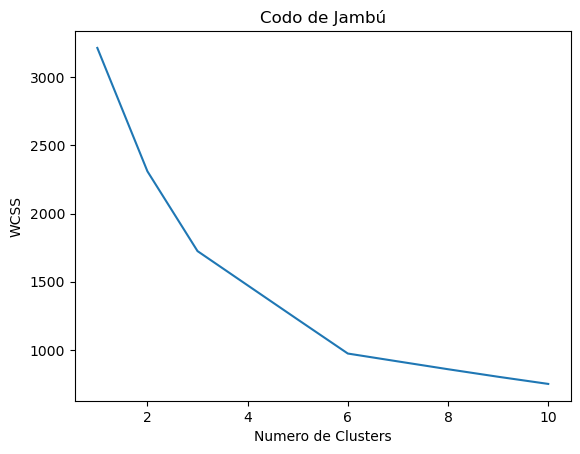

In [22]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambú")
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
#silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
#print("Silhouette Score:", silhouette_avg)

In [24]:
clustering = KMeans(n_clusters=3,max_iter=300)
clustering.fit(df_norm)

C:\Users\angie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [25]:
df['KMeans_Clusters'] = clustering.labels_
df.head()

,ID,Edad,Ingresos Anuales,Gasto Mensual,Puntuaci¢n de Crdito,Comportamiento en linea,Compras en el ultimo a¤o,Genero_encoded,Regi¢n_encoded,KMeans_Clusters
0,1,21,222011,2297,335,8,81,1,3,1
1,2,26,239229,3420,329,10,27,1,2,1
2,3,38,716278,36965,711,9,82,1,2,2
3,4,64,697325,9846,855,2,6,0,3,0
4,5,52,1032569,6607,989,3,2,0,3,0


In [44]:
silhouette_avg = silhouette_score(df_norm, df['KMeans_Clusters'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.33396019986588854


In [30]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_norm)
pca_df_df = pd.DataFrame(data=pca_df, columns = ['Componente_1','Componente_2'])
pca_nombres_df = pd.concat([pca_df_df, df[['KMeans_Clusters']]],axis=1)

pca_df_df

,Componente_1,Componente_2
0,-0.641679,-0.483932
1,-0.577673,-0.486120
2,-0.197733,-0.486958
3,0.730862,0.537707
4,0.671359,0.536813
...,...,...
2995,-0.255819,-0.515921
2996,-0.314844,-0.522146
2997,-0.336859,-0.523429
2998,-0.521006,0.476919


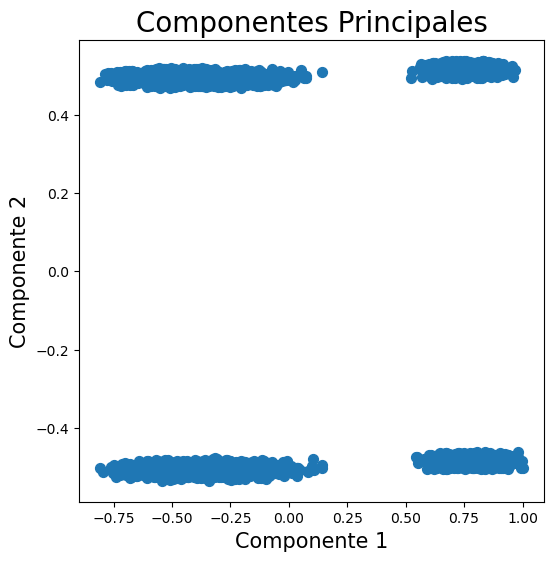

In [35]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme=np.array(["blue","green","orange"])
ax.scatter(x=pca_nombres_df.Componente_1, y=pca_nombres_df.Componente_2, s=50)

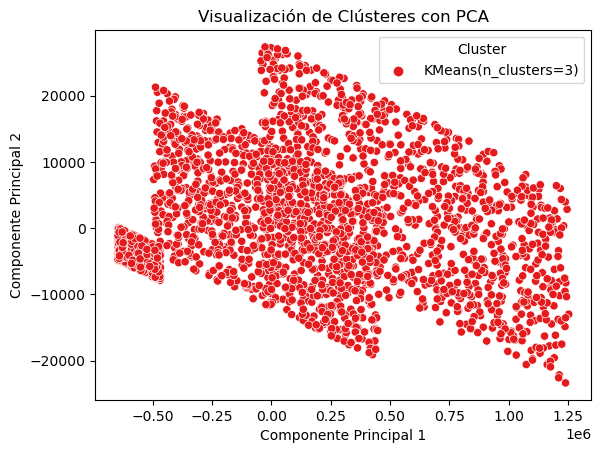

In [45]:
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(df)
componentes_principales_df = pd.DataFrame(data=componentes_principales, columns=['Componente Principal 1', 'Componente Principal 2'])
componentes_principales_df['Cluster'] = clustering

sns.scatterplot(data=componentes_principales_df, x='Componente Principal 1', y='Componente Principal 2', hue='Cluster', palette='Set1')
plt.title('Visualización de Clústeres con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()